In [21]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
# sns.set_style("darkgrid")

```
python scripts/predict.py -dataset test
python scripts/predict.y -dataset train
```

# Find best model

In [61]:
runs = glob("/home/jok120/protein-transformer/coords/*/*.tch")

In [64]:
runs

['/home/jok120/protein-transformer/coords/test_casp12_pnbest_04_best/casp12_pnbest_04_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_casp12_pnbest_02_best/casp12_pnbest_02_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_casp12_rnn_250lr2b12_best/casp12_rnn_250lr2b12_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_b_casp12_09_best/b_casp12_09_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_casp12_pnbest_01_best/casp12_pnbest_01_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_b_casp12_03_best/b_casp12_03_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_casp12_pnbest_06_best/casp12_pnbest_06_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/b_casp12_03_best/b_casp12_03_best_test_trans-evalution.tch',
 '/home/jok120/protein-transformer/coords/test_b_casp12_08_best/b_casp12_08_best_te

In [63]:
for r in runs:
    print(r[50:])
    d = torch.load(r)
    summary(d)

2_pnbest_04_best/casp12_pnbest_04_best_test_trans-evalution.tch
RMSE: 0.792 0.041
DRMSD: 17.003 5.213
RMSD: 20.553 4.643
2_pnbest_02_best/casp12_pnbest_02_best_test_trans-evalution.tch
RMSE: 0.689 0.041
DRMSD: 16.428 5.056
RMSD: 20.371 4.721
2_rnn_250lr2b12_best/casp12_rnn_250lr2b12_best_test_trans-evalution.tch
RMSE: 0.680 0.041
DRMSD: 15.140 4.929
RMSD: 20.557 4.257
p12_09_best/b_casp12_09_best_test_trans-evalution.tch
RMSE: 0.769 0.039
DRMSD: 15.623 4.708
RMSD: 19.335 4.375
2_pnbest_01_best/casp12_pnbest_01_best_test_trans-evalution.tch
RMSE: 0.758 0.022
DRMSD: 17.154 5.035
RMSD: 21.595 5.085
p12_03_best/b_casp12_03_best_test_trans-evalution.tch
RMSE: 0.712 0.026
DRMSD: 13.890 4.262
RMSD: 21.778 4.875
2_pnbest_06_best/casp12_pnbest_06_best_test_trans-evalution.tch
RMSE: 0.905 0.018
DRMSD: 17.348 5.464
RMSD: 20.146 4.876
3_best/b_casp12_03_best_test_trans-evalution.tch
RMSE: 0.705 0.031
DRMSD: 14.769 3.582
RMSD: 23.625 4.465
p12_08_best/b_casp12_08_best_test_trans-evalution.tch
RMSE:

The best (RMSD) RNN is casp12_rnn_500b12_best with
```
RMSE: 0.588 0.014
DRMSD: 16.875 4.557
RMSD: 19.894 5.101
```

The best transformer is b_casp12_07_best with
```
RMSE: 0.708 0.008
DRMSD: 17.777 5.123
RMSD: 18.085 4.323
```

In [65]:
trf = torch.load(runs[10])
rnn = torch.load(runs[-4])

# Plots

In [66]:
for dictionary in [rnn, trf]:
    for k, v in dictionary.items():
        dictionary[k] = np.array(v)

In [67]:
plt.rcParams['figure.figsize'] = [6, 4]#[30.6, 20.4]
plt.rcParams.update({'font.size': 13})

In [68]:
!mkdir figs

mkdir: cannot create directory ‘figs’: File exists


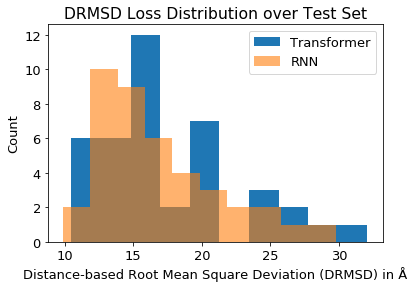

In [69]:
# sns.distplot(trf["drmsd"],kde=False, label="Transformer")
plt.hist(trf["drmsd"], label="Transformer")
# sns.distplot(rnn["drmsd"],kde=False, label="RNN")
plt.hist(rnn["drmsd"], label="RNN", alpha=0.6)
plt.legend()
plt.title("DRMSD Loss Distribution over Test Set")
plt.ylabel("Count")
plt.xlabel("Distance-based Root Mean Square Deviation (DRMSD) in Å")
plt.savefig("figs/190815_drmsd_comparison.pdf")

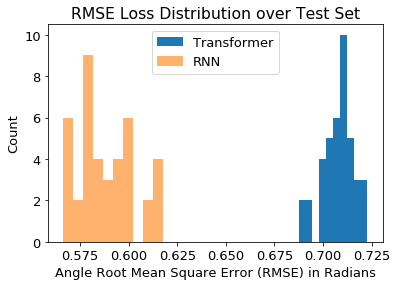

In [70]:
# sns.distplot(np.sqrt(trf["mse"]),kde=False, label="Transformer")
# sns.distplot(np.sqrt(rnn["mse"]),kde=False, label="RNN")
plt.hist(np.sqrt(trf["mse"]), label="Transformer")
plt.hist(np.sqrt(rnn["mse"]), label="RNN", alpha=0.6)
plt.legend()
plt.title("RMSE Loss Distribution over Test Set")
plt.ylabel("Count")
plt.xlabel("Angle Root Mean Square Error (RMSE) in Radians")
plt.savefig("figs/190815_rmse_comparison.pdf")

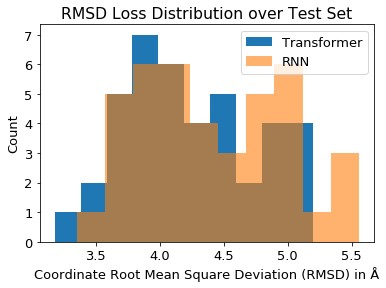

In [73]:
# sns.distplot(np.sqrt(trf["mse"]),kde=False, label="Transformer")
# sns.distplot(np.sqrt(rnn["mse"]),kde=False, label="RNN")
plt.hist(np.sqrt(trf["rmsd"]), label="Transformer")
plt.hist(np.sqrt(rnn["rmsd"]), label="RNN", alpha=0.6)
plt.legend()
plt.title("RMSD Loss Distribution over Test Set")
plt.ylabel("Count")
plt.xlabel("Coordinate Root Mean Square Deviation (RMSD) in Å")
plt.savefig("figs/190815_rmsd_comparison.pdf")

In [72]:
def summary(di):
    for k, v in di.items():
        di[k] = np.array(v)
    print("RMSE:", end=" ")
    print("{:.3f} {:.3f}".format(np.sqrt(di["mse"]).mean(), np.sqrt(di["mse"]).std()))
    print("DRMSD:", end=" ")
    print("{:.3f} {:.3f}".format(di["drmsd"].mean(), di["drmsd"].std()))
    print("RMSD:", end=" ")
    print("{:.3f} {:.3f}".format(di["rmsd"].mean(), di["rmsd"].std()))

In [57]:
summary(trf)

RMSE: 0.680 0.041
DRMSD: 15.140 4.929
RMSD: 20.557 4.257


In [58]:
summary(rnn)

RMSE: 0.712 0.026
DRMSD: 13.890 4.262
RMSD: 21.778 4.875


# Compare batch time

In [29]:
import pandas as pd
rnn_log = pd.read_csv("/home/jok120/Desktop/safekeeping/0602-rnn_q3-01.train")
trf_log = pd.read_csv("/home/jok120/Desktop/safekeeping/0602-q3_adam-0457c.train")

In [17]:
time_rnn = rnn_log["time"].iloc[9] - rnn_log["time"].iloc[8]
print(time_rnn)

NameError: name 'rnn_log' is not defined

In [37]:
time_trf = trf_log["time"].iloc[9] - trf_log["time"].iloc[8]
print(time_trf)

2.5513086318969727

In [ ]:
print(time_trf / 12)
print(time_rnn / 4)